In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reviews_df=pd.read_csv('data/Reviews.csv')
reviews_df.shape

(3999, 10)

In [3]:
reviews_df.head()

Id   ProductId          UserId                    ProfileName  \
0   50057  B000ER5DFQ  A1ESDLEDR9Y0JX                     A. Spencer   
1  366917  B001AIQP8M  A324KM3YY1DWQG                      danitrice   
2  214380  B001E5E1XW  A3QCWO53N69HW3  M. A. Vaughan "-_-GOBNOGO-_-"   
3  178476  B000TIZP5I   AYZ5NG9705AG1                       Consumer   
4  542504  B000E18CVE  A2LMWCJUF5HZ4Z             Miki Lam "mikilam"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       2      1  1310256000   
1                     0                       0      5  1251072000   
2                     2                       2      5  1276473600   
3                     0                       0      5  1341360000   
4                     8                      11      3  1222732800   

                                      Summary  \
0  the garbanzo beans in it give horrible gas   
1                      Yummy Lil' Treasures!!   
2                                  Great Chai   
3               Celtic Salt worth extra price   
4                              mixed feelings   

                                                Text  
0  To be fair only one of my twins got gas from t...  
1  Just recieved our first order of these (they d...  
2  This is a fantastic Chai Masala. I am very pic...  
3  Flavorful and has added nutrition!  You use le...  
4  I thought this soup tasted good. I liked the t...

In [4]:
reviews_df = reviews_df[['Text','Score']].dropna()

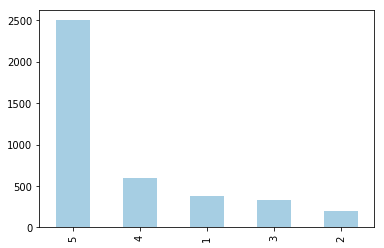

In [5]:
ax=reviews_df.Score.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

In [6]:
reviews_df.Score[reviews_df.Score<=3]=0
reviews_df.Score[reviews_df.Score>=4]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


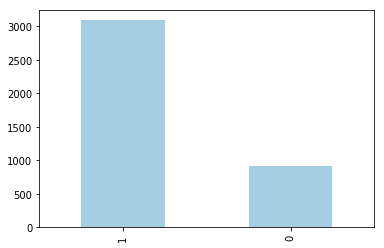

In [7]:
ax=reviews_df.Score.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

In [8]:
reviews_df.head()

Text  Score
0  To be fair only one of my twins got gas from t...      0
1  Just recieved our first order of these (they d...      1
2  This is a fantastic Chai Masala. I am very pic...      1
3  Flavorful and has added nutrition!  You use le...      1
4  I thought this soup tasted good. I liked the t...      0

In [9]:
import spacy
nlp = spacy.load("en_core_web_md") 

In [28]:
train_examples = []
labels = []

for index, row in reviews_df.iterrows():
    text = row["Text"]
    rating = row["Score"]
    labels.append(rating)
    tokens = [token.text for token in nlp(text)]
    train_examples.append(tokens)    

In [29]:
train_examples[0]

['To',
 'be',
 'fair',
 'only',
 'one',
 'of',
 'my',
 'twins',
 'got',
 'gas',
 'from',
 'this',
 'but',
 'it',
 'was',
 'horrible',
 '.',
 'Up',
 'all',
 'night',
 'screaming',
 'from',
 'gas',
 'pains',
 '.',
 'Garbanzo',
 'beans',
 'are',
 'not',
 'an',
 'ideal',
 'food',
 'for',
 'young',
 'babies',
 '.']

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [30]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(train_examples)

sequences = tokenizer.texts_to_sequences(train_examples)

In [27]:
train_examples[0]

[To,
 be,
 fair,
 only,
 one,
 of,
 my,
 twins,
 got,
 gas,
 from,
 this,
 but,
 it,
 was,
 horrible,
 .,
 Up,
 all,
 night,
 screaming,
 from,
 gas,
 pains,
 .,
 Garbanzo,
 beans,
 are,
 not,
 an,
 ideal,
 food,
 for,
 young,
 babies,
 .]

In [82]:
sequences[0]

[7,
 40,
 1489,
 71,
 48,
 10,
 15,
 6075,
 159,
 1158,
 54,
 12,
 19,
 8,
 24,
 1187,
 1,
 69,
 44,
 661,
 6076,
 54,
 1158,
 3346,
 1,
 4895,
 387,
 22,
 23,
 76,
 1927,
 65,
 13,
 1667,
 1928,
 1]

In [49]:
MAX_LEN = 50

X = pad_sequences(sequences, MAX_LEN, padding="post")

X = np.array(X)
y = np.array(labels)

In [68]:
y = y.reshape(y.shape[0] , 1)

In [69]:
y.shape

(3999, 1)

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras import optimizers

In [88]:
sentence_input = Input(shape=(None,))
embedding =  Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 100)(sentence_input)
LSTM_layer = LSTM(units=256)(embedding)
output_dense = Dense(1, activation='sigmoid')(LSTM_layer)

In [89]:
model = Model(inputs=[sentence_input],outputs=[output_dense])

In [90]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 100)         1623900   
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 1,989,725
Trainable params: 1,989,725
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [92]:
model.fit(x=X,
          y=y,
          batch_size=64,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
50/50 [==============================] - 8s 164ms/step - loss: 0.5400 - accuracy: 0.7706 - val_loss: 0.5304 - val_accuracy: 0.7563
Epoch 2/5
50/50 [==============================] - 8s 154ms/step - loss: 0.4032 - accuracy: 0.8224 - val_loss: 0.4743 - val_accuracy: 0.7875
Epoch 3/5
50/50 [==============================] - 8s 153ms/step - loss: 0.2242 - accuracy: 0.9159 - val_loss: 0.4577 - val_accuracy: 0.7975
Epoch 4/5
50/50 [==============================] - 8s 158ms/step - loss: 0.1400 - accuracy: 0.9578 - val_loss: 0.6093 - val_accuracy: 0.7912
Epoch 5/5
50/50 [==============================] - 8s 154ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.6885 - val_accuracy: 0.7950
